# Epidemic Simulations

## Introduction

For this project, we will be simulating how a disease spreads out during an epidemic. It's good to know the difference between an epidemic and a pandemic. An epidemic is defined as a sudden outbreak of a disease. When the outbreak reaches a large population over multiple countries, we can then consider it as a pandemic.

### Why Do We Need to Simulate Epidemics?
It's important to learn how a disease spreads given the current events. Covid-19 has spread like wildfire and is now considered a global pandemic. By simulating epidemics, we can further improve protocols and procedures to help prevent the spread of diseases, and to prevent any future crises to happen on earth.

### Goals of this Project
There are two types of cases that we will analyze. The first case is how a disease will spread if there is no vaccination. The second case is when there is a vaccination, so some people cannot be vaccinated.

### Methodology
We will use arrays in python to create the simulations.  Each array will be a (200x200) array with each cell being a person. The center 16 cells will start out being the initial infected cells. When a cell is infected, its color will be orange. If the cell is healthy, its color will be green. When a cell recovers from the disease, its color will change to blue. Finally, if the cell has immunity, its color will be red.

A cell becoming infected is dependent on two things. The first thing is the probability of infection, denoted as $p_i$. The second thing will be how many cells surrounding the cell of interest are already infected. The formula used to account for the probabilities of each infected cell is

$$1 - (1 - p_i)^k$$

The $(1 - p_i)$ is the probability of a cell not being infected raised the $k$ number of surrounding cells that are infected. This yields the total probability of all surrounding infected cells not being infected. From there, we take the complement of that probability by subtracting the total probability of all surrounding, infected cells from one. This complement is the probability of getting infected with a k amount of surrounding infected cells.

### Outline of Project

1. Analysis of epidemic with no vaccinated cells

2. Analysis of epidemic with vaccinated cells

3. Conclusion

In [38]:
# This will allow us to render interactive plots.
%matplotlib notebook

In [39]:
# We import the numpy, matplotlib and random libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors
import random

## Analyis of the Epidemic with No Vaccine.

We will start with analyzing a population that does not have any vaccine. We will create a $200$ $x$ $200$ array with the central 16 cells being infected.

In [23]:
# We initiate our (200 x 200) our starting population with the center 16 cells infected
Ori_Pop = np.zeros([200,200], dtype=int) 
Ori_Pop[97:101,97:101] = np.ones([4,4], dtype = int)

We then write a function `infect_count` that will take a healthy cell and count how many surrounding cells are infected.

In [40]:
# This function will determine how many cells around a specific, healthy, cell are infected.
    # The inputs are some array and a tuple that represents a coordinate in the array.
def infect_count(array, tups):   
# This is a variable to count the infected cells
    c = 0  
# The infect variable is a 3x3 array with the tuple in the middle 
    infect = np.array(array[tups[0] - 1: tups[0] + 2,tups[1] - 1: tups[1] + 2])
# This for loop iterates over each cell in the infect array
    for a, b in [(a,b) for a in range(np.shape(infect)[0]) for b in range(np.shape(infect)[1])]:    
    # This if statement determines if the cell is already infected or not.
        if infect[1,1] == 1 or infect[1,1] == -1:
            break
    # This elif statement counts each infected cell.     
        elif infect[a,b] == 1:
            c += 1
    return c

The function `epidemics` will create the epidemic over time using the probabilities we discussed in the introduction and the `infect_count`.

In [41]:
# This function updates the population array to animate the spread of the infection.
# The inputs are an array, the probability of infection, and the probability of recovery.
def epidemics(in_array, pi, pr):
# Creates a copy of the in_array to munipulate.
    out_array = np.copy(in_array)       
# This for loop iterates over the inputted array.    
    for i, j in [(i,j) for i in range(np.shape(in_array)[0]) for j in range(np.shape(in_array)[1])]:
# If the cell is not infected, assign a variable with a random probability
        if in_array[i, j] == 0:
            p = random.random()     
        # if the probability is less than some infection probability, the cell becomes infected.
            if p < (1 - (1 - pi)**infect_count(in_array, (i,j))):
                out_array[i, j] += 1
# this for loop iterates over the inputted array.
    for i, j in [(i,j) for i in range(np.shape(in_array)[0]) for j in range(np.shape(in_array)[1])]:     
    # If the cell equals one, assign a random probability to the variable p1.
        if in_array[i, j] == 1:
            p1 = random.random()     
        # If p1 is less than the probability of recovery, the cell gets recovered.
            if p1 < pr:
                out_array[i, j] += 1   
# Return the array copy            
    return out_array

Using the previous functions, we now create a simulation to see how the disease spreads. The `animate` function creates the animiation itself. It also allows us to choose what probabilities we want for $p_i$ and the probability of recovery, denoted $p_r$. The default probability for $p_i$ is .1 and the default proability for $p_r$ is .025.

<IPython.core.display.Javascript object>


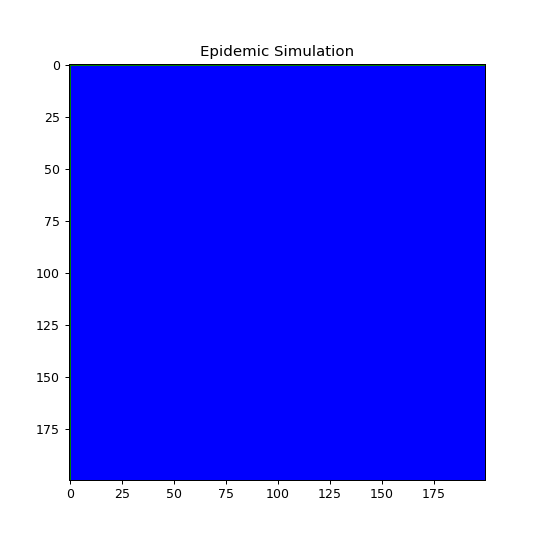

In [26]:
# Sets up a figure for the animation
fig = plt.figure(figsize = (6,6))
# Sets up a subplot
ax = plt.subplot(111) 
# Assigns a title for the animation
plt.title("Epidemic Simulation")
# What colors do you want on your animation?
cmap = colors.ListedColormap(['red', 'green', 'orange', 'blue'])
# Red = immunity, Green = healthy, Orange = Infected, Blue = Recovered
im = ax.imshow(Ori_Pop, cmap = cmap, vmin = -1, vmax = 2)                       
    
# This function creates the animation with i being frames per millisecond.
def animate(i, pi=.1, pr=.01):
    global Ori_Pop
    
    Ori_Pop=epidemics(Ori_Pop,pi,pr)
    im.set_data(Ori_Pop)
    return im

# This plots the animation.
anim = FuncAnimation(fig=fig, func=animate,  interval=100, blit=True, repeat=False)
plt.show()

Overtime, we can see that that as more cells become infected, the faster the infection rate becomes. This makes sense because as more cells become infected, the higher chance $k$, the number of cells surrounding a healthy cell are infected is a larger quantity.

Another thing we can see is that some cells recover faster than others. You can see this because recovered cells are spread out among the sea of infected cells. This might be because different people have different genes and immune systems. 

## Analysis of the Epidemic with a Vaccine.

We will now analyze how the disease spreads with a certain number of cells having a vaccine. We can hypothesize that with less cells being able to be infected, the slower the infection rate will be overtime.

We will now initiate a new $200$ $x$ $200$ array for the population with vaccines.

In [47]:
# We initiate our (200 x 200) our starting population with the center 16 cells infected
Ori_Pop_Immunity = np.zeros([200,200], dtype=int) 
Ori_Pop_Immunity[97:101,97:101] = np.ones([4,4], dtype = int)

The function `immunity` will randomly assign a certain percentage of the cells with vaccinations. The default percentage is 10%.

In [48]:
# This function randomly assigns cells to have vaccinations.
# The input is some array.
def immunity(array, vc=.01):
# Here we create a for loop to iterate over each cell in the population array.
    for i, j in [(i,j) for i in range(np.shape(array)[0]) for j in range(np.shape(array)[1])]: 
    # Generate a ran probability for each cell.
        ran = random.random() 
    # If that prob is less than some threshhold probability.
        if (ran < vc):   
        # Make that cell = -1.
            array[i,j] = -1

immunity(Ori_Pop_Immunity)

Like before, we initialize another visualization to create the animation using the same functions as before.

<IPython.core.display.Javascript object>


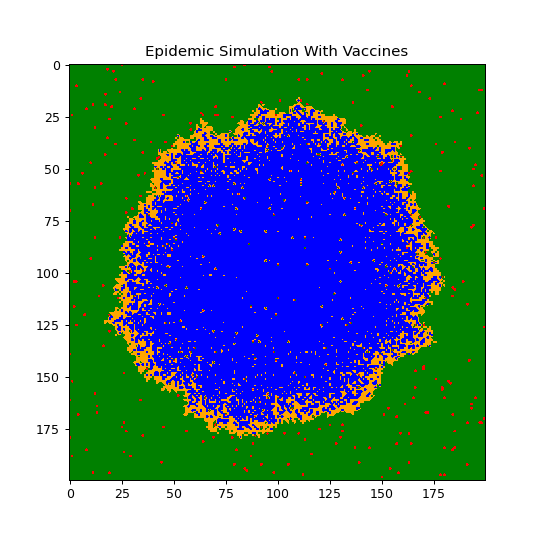

In [49]:
# Sets up a figure for the animation
fig_I = plt.figure(figsize = (6,6))
# Sets up a subplot
ax_I = plt.subplot(111) 
# Assigns a title for the animation
plt.title("Epidemic Simulation With Vaccines")
# What colors do you want on your animation?
cmap_I = colors.ListedColormap(['red', 'green', 'orange', 'blue'])
# Red = immunity, Green = healthy, Orange = Infected, Blue = Recovered
im_I = ax_I.imshow(Ori_Pop_Immunity, cmap = cmap, vmin = -1, vmax = 2)                       
    
# This function creates the animation with i being frames per millisecond.
def animate_I(i, pi=.05, pr=.025):
    global Ori_Pop_Immunity
    
    Ori_Pop_Immunity=epidemics(Ori_Pop_Immunity,pi,pr)
    im_I.set_data(Ori_Pop_Immunity)
    return im_I

# This plots the animation.
anim_I = FuncAnimation(fig=fig_I, func=animate_I,  interval=100, blit=True, repeat=False)
plt.show()

What we can see is that the infection rate increases at a slower rate. This is due to less possible cells to be infected for $k$. Another thing we can see is that recovery rates are much faster, though this may only be happening only because there are less cells that need recovering.

## Conclusion

To summarize what we found in case one, if no vaccination exists, and case two, where a vaccine is given to people, the more people that get infected, the faster the disease will spread. So when trying to prevent an epidemic, its crucial to find ways to isolate and minimize the number of people getting infected. Having more people vaccinated also slows down the spread because there are less people to spread the disease. We can see how vaccinations slow the spread by allowing 1% of the population to have the vaccine. From a visual standpoint, it takes significantly longer for the disease to spread across the whole board.